important 変数を個々に定義する

In [13]:
SensorNum=1 # Sensor number
SampleNum=32 # Window Width
Overlap=0.5 # overlap
width=3000 # graph width 
EncodingDim=[4,8,12,16,32,64] # number of hidden layer note 
Axis='AccZ' # Axis

In [14]:
import numpy as np
import pandas as pd
from scipy import fftpack
from scipy import signal
import time
import os
import matplotlib.pyplot as plt
import pylab
import pickle
import copy

import processing
import window

import matplotlib.animation as animation
import datetime

%matplotlib inline

In [15]:
from keras.models import Sequential
from keras.datasets import cifar10
from keras.layers import Dense, Activation, Flatten
from keras.optimizers import Adadelta
from keras.utils import np_utils
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.utils.visualize_util import model_to_dot, plot
from keras import backend as K
from keras.layers import Input, Dense
from keras.models import Model
from keras.callbacks import EarlyStopping

import matplotlib.image as mpimg


In [16]:
DataName='sensor'+str(SensorNum)+'_'+Axis
SensorName='sensor'+str(SensorNum)
DicName='MemSensor'+str(SensorNum)

In [17]:
WORKSPACE_PATH = '/home/takeyama/pywork/ipython/2016-07-11'

StudyDataPath=WORKSPACE_PATH+'/Study/'+DataName+'/'+'Window='+str(SampleNum)+'-Overlap='+str(Overlap*100)+'/'
if not os.path.exists(StudyDataPath): os.makedirs(StudyDataPath)

GraphDataPath=WORKSPACE_PATH+'/Graph/'+DataName+'/Learning-Window='+str(SampleNum)+'-Overlap='+str(Overlap*100)+'/'
if not os.path.exists(GraphDataPath): os.makedirs(GraphDataPath)

StudyDataModelPicPath=WORKSPACE_PATH+'/Study/'+DataName+'/modelPic-Window='+str(SampleNum)+'-Overlap='+str(Overlap*100)+'/'
if not os.path.exists(StudyDataModelPicPath): os.makedirs(StudyDataModelPicPath)

WindowDataPath=WORKSPACE_PATH+'/window/'
RawDataPath=WORKSPACE_PATH+'/raw/'

**前回やった学習をもう１度やってみる**

Graph range=0 : 3000
Graph range=3000 : 6000
Graph range=6000 : 9000
Graph range=9000 : 12000
Graph range=12000 : 15000
Graph range=15000 : 18000
Graph range=18000 : 21000
Graph range=21000 : 24000
Graph range=24000 : 27000
Graph range=27000 : 30000
Graph range=30000 : 33000
Graph range=33000 : 36000
Graph range=36000 : 39000
Graph range=39000 : 42000
Graph range=42000 : 45000
Graph range=45000 : 48000
Graph range=48000 : 51000
Graph range=51000 : 54000
Graph range=54000 : 57000
Graph range=57000 : 60000
Graph range=60000 : 63000
Graph range=63000 : 66000
Graph range=66000 : 69000
Graph range=69000 : 72000
Graph range=72000 : 75000
Graph range=75000 : 78000
Graph range=78000 : 81000
Graph range=81000 : 84000
Graph range=84000 : 87000
Graph range=87000 : 90000
Graph range=90000 : 93000
Graph range=93000 : 96000
Graph range=96000 : 99000
Graph range=99000 : 102000
Graph range=102000 : 105000
Graph range=105000 : 108000
Graph range=108000 : 111000
Graph range=111000 : 114000
Graph range=1

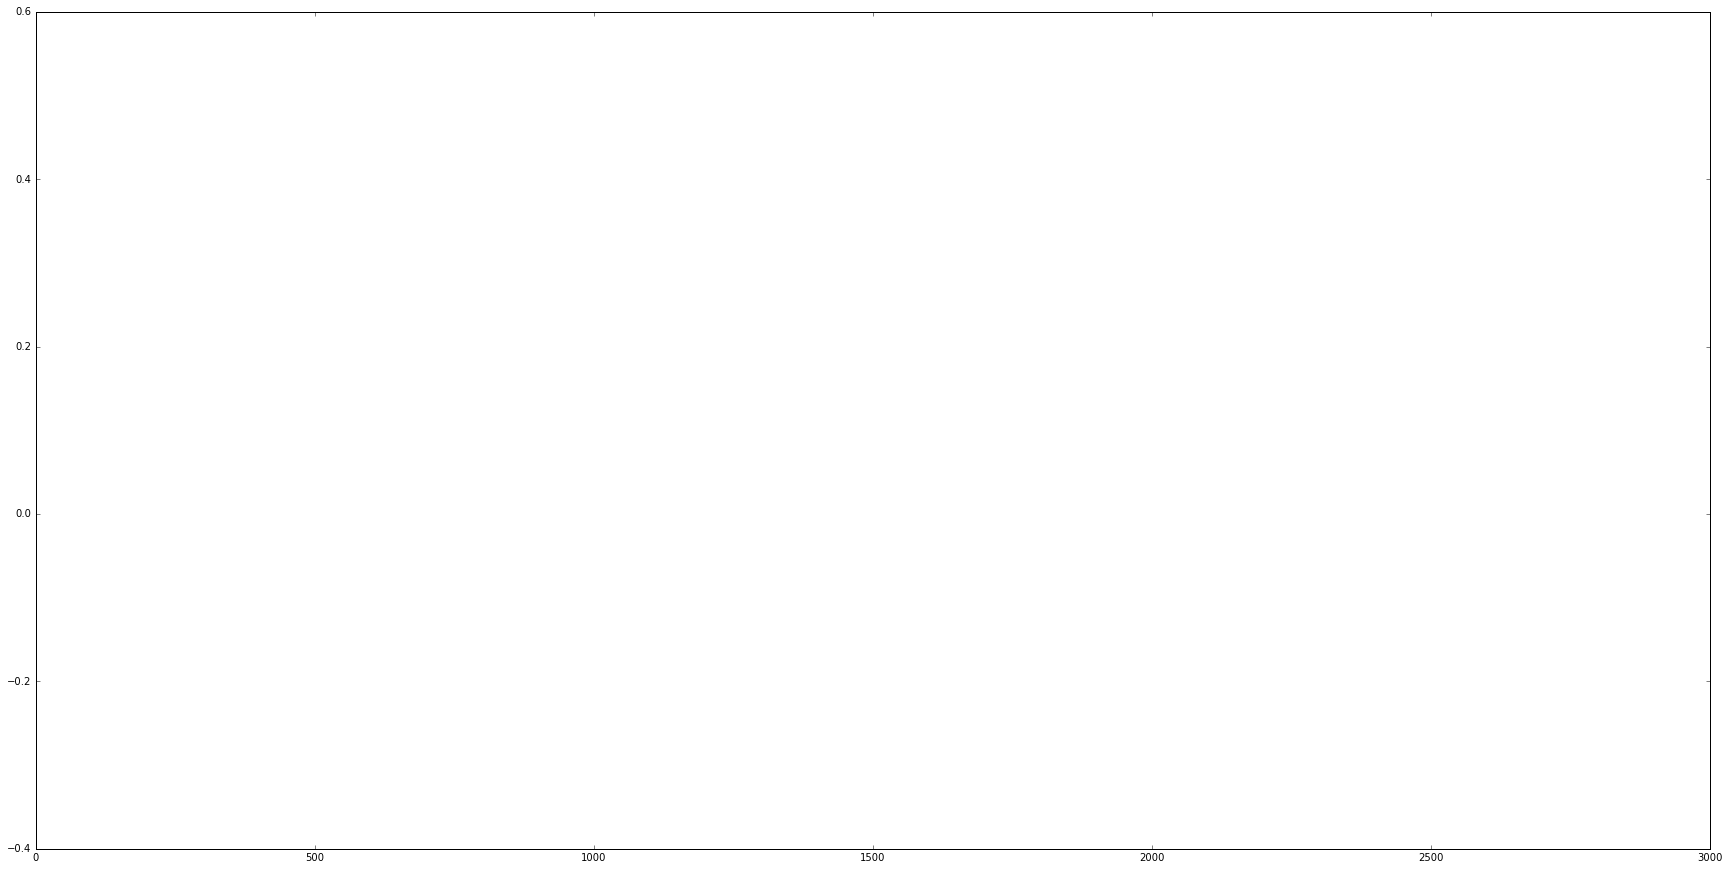

In [18]:
fig = plt.figure(figsize=(30,15))
ax = fig.add_subplot(111)

for encoding_dim in EncodingDim:
    CommonName = '_edim='+str(encoding_dim)+'-Window='+str(SampleNum)+'-Overlap='+str(Overlap*100)
    SaveFileNameDecord=DataName+'_decoded'+CommonName
    SaveFileNameTrain=DataName+'_train'+CommonName
    SaveFileNameTest=DataName+'_test'+CommonName
    SaveFileNameGraph=GraphDataPath+DataName+CommonName
    
    # load train data
    window = processing.LoadDicDataFromFileNPZ(WindowDataPath+SaveFileNameTrain+'.npz')
    rawData = window.reshape(window.size,1)
    
    # AutoEncoder Output
    reconstructData = processing.LoadDicDataFromFileNPZ(StudyDataPath+SaveFileNameDecord+'.npz')
    reconstructData = reconstructData.reshape(reconstructData.size,1)
    
    for i in range(width,rawData.size,width):
        start =i-width 
        goal=i
        
        dataE = rawData[start:goal]
        dataD = reconstructData[start:goal]
        
        
        ax.plot(range(0,len(dataE)),dataE,'r',label="raw data")
        ax.plot(range(0,len(dataD)),dataD,'b',label="reconstruct")
        ax.legend(loc='best',fontsize=40)
        ax.set_title(str(start)+"-"+str(goal))
        ax.figure.savefig(SaveFileNameGraph+'-'+str(start)+"-"+str(goal)+'-'+'graph.jpg')
        ax.clear()
        print 'Graph range='+str(start)+' : '+str(goal)
        time.sleep(3)